In [11]:
import sys
sys.path.append("/tf/ProjectGabriel/teixeira24-delve-dr2-phz/")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 


import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from astropy.io import fits
from astropy.table import Table

from tqdm import tqdm
import os
import sys


def mkdir(directory_path): 
    if os.path.exists(directory_path): 
        return directory_path
    else: 
        try: 
            os.makedirs(directory_path)
        except: 
            # in case another machine created the path meanwhile !:(
            return sys.exit("Erro ao criar diretório") 
        return directory_path


def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table

    
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':22.0,
                        'text.color':'black',
                        'text.usetex':False,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})

In [20]:
DLCAT = pd.read_csv('../data/dlcat/dlcat.csv')

DLTRAIN_A = pd.read_csv('../data/dlcat/dltrain_a.csv')
# DLTRAIN_B = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_train_flat_GRIZ_B.csv')
# DLTRAIN_C = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_train_flat_GRIZ_C.csv')

TEST_DATA = pd.read_csv('../data/dlcat/test_data.csv')

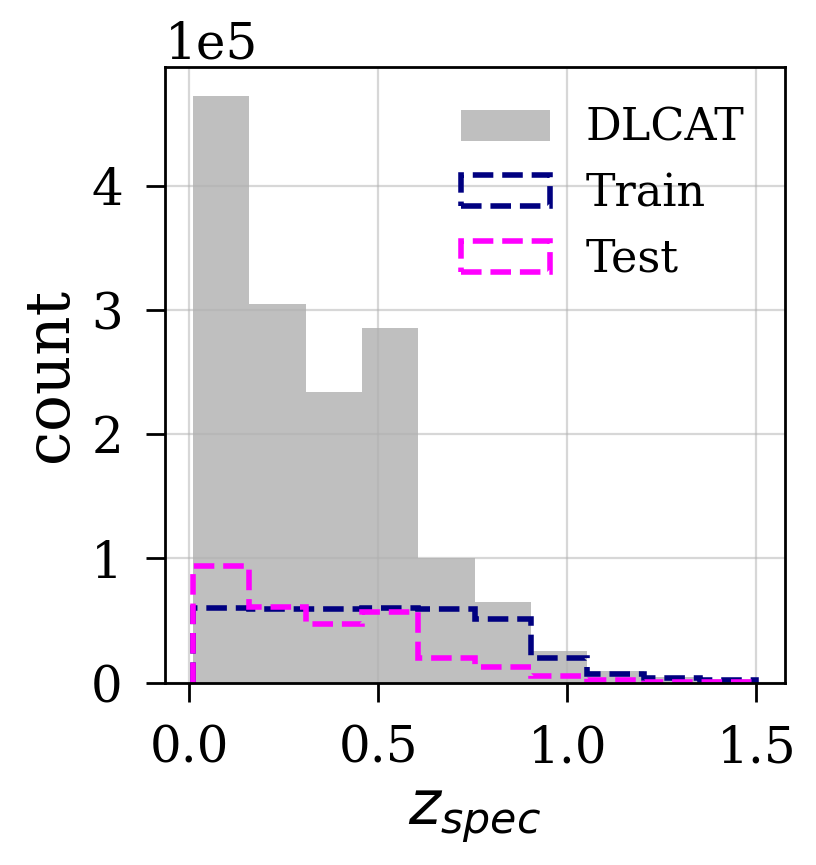

In [14]:
plt_style()
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
fontsize = 22
tick_font = 18

ax.hist(DLCAT['Z'], histtype='bar', ls='--', color='grey', lw=2, alpha=.5, label="DLCAT")
ax.hist(DLTRAIN_A['Z'], histtype='step', ls='--', color='navy', lw=2, label="Train")
ax.hist(TEST_DATA['Z'], histtype='step', ls='--', color='magenta', lw=2, label="Test")

ax.tick_params(axis='both', which='major', labelsize=tick_font)

ax.set_xlabel('$z_{spec}$', fontsize=fontsize)
ax.set_ylabel('count', fontsize=fontsize)
ax.grid(alpha=.5)
ax.yaxis.get_offset_text().set_fontsize(tick_font)
plt.legend(fontsize=16)
plt.savefig('../figures/DLCAT_HIST.pdf', bbox_inches='tight')